In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn import linear_model

In [2]:
df = pd.read_csv("melb_data.csv")
#add count column to the dataset as an index.
df['Count'] = np.arange(len(df))
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,1
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,4


In [3]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,13575
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,13576
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,13577
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,13578
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0,13579


In [4]:
#information about columns, includes the type of data, the null count etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
#unique values of each of the features to check for duplication, here you can see the address column has some duplicates.
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
Count            13580
dtype: int64

## DESCRIPTIVE ANALYSIS FOR ALL THE FEATURES

In [6]:
#descriptive statistics of the dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


# Hypothesis Testing Against House Price

In [7]:
#defining the hypothesis
null_hypothesis="NULL HYPOTHESIS: The mean price of houses built after 1990 has no difference"
#extracting the sample data for the hypothesis
new_houses = df.loc[(df['YearBuilt']>1990)]
#calculating p value using scipy library
_,p_value=stats.ttest_1samp(a=new_houses['Price'],popmean=df['Price'].mean())
if(p_value<0.05):
    print(null_hypothesis)
    print("P Value: ",p_value)
    print("HYPOTHESIS REJECTED")
else:
    print(null_hypothesis)
    print("HYPOTHESIS ACCEPTED")


NULL HYPOTHESIS: The mean price of houses built after 1990 has no difference
P Value:  6.242325340339285e-23
HYPOTHESIS REJECTED


In [8]:
#defining the hypothesis
null_hypothesis="NULL HYPOTHESIS: The mean price of houses categorised as UNITS is same as mean of overall price."
#extracting the sample data for the hypothesis
new_houses = df.loc[(df['Type']=='u')]
#calculating p value using scipy library
_,p_value=stats.ttest_1samp(a=new_houses['Price'],popmean=df['Price'].mean())
if(p_value<0.05):
    print(null_hypothesis)
    print("P Value: ",p_value)
    print("HYPOTHESIS REJECTED")
else:
    print(null_hypothesis)
    print("HYPOTHESIS ACCEPTED")

NULL HYPOTHESIS: The mean price of houses categorised as UNITS is same as mean of overall price.
P Value:  0.0
HYPOTHESIS REJECTED


In [9]:
#defining the hypothesis
null_hypothesis="NULL HYPOTHESIS: The mean price of houses with parking space for one car is equivalent to overall mean."
#extracting the sample data for the hypothesis
_houses = df.loc[(df['Car']==1)]
#calculating p value using scipy library
_,p_value=stats.ttest_1samp(a=_houses['Price'],popmean=df['Price'].mean())
if(p_value<0.05):
    print(null_hypothesis)
    print("P Value: ",p_value)
    print("HYPOTHESIS REJECTED")
else:
    print(null_hypothesis)
    print("HYPOTHESIS ACCEPTED")

NULL HYPOTHESIS: The mean price of houses with parking space for one car is equivalent to overall mean.
P Value:  2.1304898184877464e-235
HYPOTHESIS REJECTED


In [10]:
#defining the hypothesis
null_hypothesis="NULL HYPOTHESIS: The mean price of houses in Coucil area Yarra is equivalent to overall mean price. "
#extracting the sample data for the hypothesis
new_houses = df.loc[(df['CouncilArea']=='Yarra')]
#calculating p value using scipy library
_,p_value=stats.ttest_1samp(a=new_houses['Price'],popmean=df['Price'].mean())
if(p_value<0.05):
    print(null_hypothesis)
    print("P Value: ",p_value)
    print("HYPOTHESIS REJECTED")
else:
    print(null_hypothesis)
    print("HYPOTHESIS ACCEPTED")

NULL HYPOTHESIS: The mean price of houses in Coucil area Yarra is equivalent to overall mean price. 
P Value:  0.015886577336741415
HYPOTHESIS REJECTED


In [11]:
#defining the hypothesis
null_hypothesis="NULL HYPOTHESIS: The mean price of houses built after 1990 is same as houses built before 1990"
#extracting the sample data for the hypothesis
old_houses = df.loc[(df['YearBuilt']<1990)]
new_houses = df.loc[(df['YearBuilt']>1990)]
#calculating p value using scipy library
_,p_value=stats.ttest_1samp(a=old_houses['Price'],popmean=new_houses['Price'].mean())
if(p_value<0.05):
    print(null_hypothesis)
    print("P Value: ",p_value)
    print("HYPOTHESIS REJECTED")
else:
    print(null_hypothesis)
    print("HYPOTHESIS ACCEPTED")


NULL HYPOTHESIS: The mean price of houses built after 1990 is same as houses built before 1990
P Value:  6.777563562472624e-70
HYPOTHESIS REJECTED


# Removing the outliers and Duplicate values

### OUTLIERS IN YEARBUIL COLUMN


C:\Users\navde\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

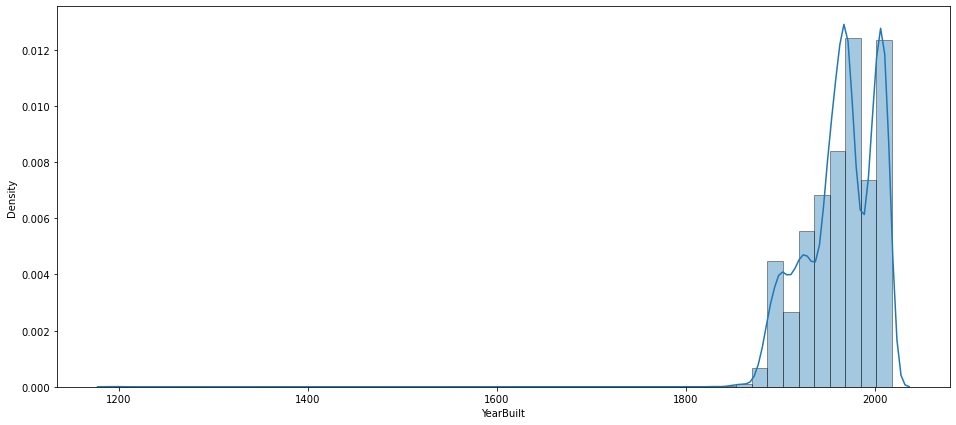

In [12]:
#plot histogram for skewness
plt.figure(figsize=(16,7))
sns.distplot(df['YearBuilt'], kde = True,hist_kws=dict(edgecolor="k"),bins=50)

In [13]:
#shape of the data
df.shape

(13580, 22)

In [14]:
#calculate z score for each value and make a column
df['z_yearbuilt']=(df.YearBuilt-df.YearBuilt.mean())/df.YearBuilt.std()

In [15]:
#data record which are outliers
df[df['z_yearbuilt']<-3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count,z_yearbuilt
2079,Collingwood,2/79 Oxford St,2,u,855000.0,S,Nelson,3/09/2016,1.6,3066.0,...,2886.0,122.0,1830.0,Yarra,-37.80420,144.98450,Northern Metropolitan,4553.0,2079,-3.613379
2554,Fitzroy,11 Henry St,2,h,677000.0,S,Chambers,27/11/2016,1.6,3065.0,...,67.0,NaN,1850.0,Yarra,-37.79690,144.97590,Northern Metropolitan,5825.0,2554,-3.076808
4843,Prahran,602/220 Commercial Rd,2,u,841000.0,S,hockingstuart,18/03/2017,4.5,3181.0,...,0.0,101.0,1850.0,Stonnington,-37.84700,144.99360,Southern Metropolitan,7717.0,4843,-3.076808
5405,Richmond,22a Stanley St,3,h,1600000.0,S,Biggin,24/09/2016,2.6,3121.0,...,80.0,144.0,1850.0,Yarra,-37.82330,144.99470,Northern Metropolitan,14949.0,5405,-3.076808
5860,St Kilda,51/167 Fitzroy St,3,u,1600000.0,PI,Kay,25/02/2017,6.1,3182.0,...,0.0,3.0,1850.0,Port Phillip,-37.85840,144.98020,Southern Metropolitan,13240.0,5860,-3.076808
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0,9968,-20.622662


In [16]:
#data record which are outliers
df[df['z_yearbuilt']>3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count,z_yearbuilt


In [17]:
#drop outlier data records.
df=df.drop(2079)
df=df.drop(2554)
df=df.drop(4843)
df=df.drop(5405)
df=df.drop(5860)
df=df.drop(9968)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13574 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13574 non-null  object 
 1   Address        13574 non-null  object 
 2   Rooms          13574 non-null  int64  
 3   Type           13574 non-null  object 
 4   Price          13574 non-null  float64
 5   Method         13574 non-null  object 
 6   SellerG        13574 non-null  object 
 7   Date           13574 non-null  object 
 8   Distance       13574 non-null  float64
 9   Postcode       13574 non-null  float64
 10  Bedroom2       13574 non-null  float64
 11  Bathroom       13574 non-null  float64
 12  Car            13512 non-null  float64
 13  Landsize       13574 non-null  float64
 14  BuildingArea   7125 non-null   float64
 15  YearBuilt      8199 non-null   float64
 16  CouncilArea    12205 non-null  object 
 17  Lattitude      13574 non-null  float64
 18  Longti

C:\Users\navde\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

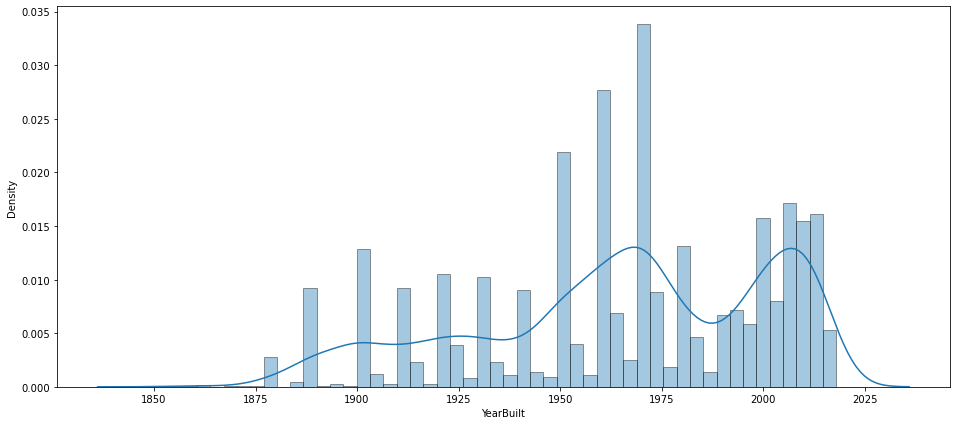

In [18]:
#histogram after removal of outliers
plt.figure(figsize=(16,7))
sns.distplot(df['YearBuilt'], kde = True,hist_kws=dict(edgecolor="k"),bins=50)

### OUTLIERS FOR ROOMS COLUMN

In [19]:
#CALCUTE Z SCORE FOR ROOMS DATA COLUMMN
df['z_rooms']=(df.Rooms-df.Rooms.mean())/df.Rooms.std()

In [20]:
#find outliers
df[df['z_rooms']<-3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count,z_yearbuilt,z_rooms


In [21]:
#find outliers
room_outliers=(df[df['z_rooms']>3.5])
room_outliers

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count,z_yearbuilt,z_rooms
379,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,hockingstuart,10/09/2016,11.0,3147.0,...,618.00,2009.0,Boroondara,-37.87290,145.07880,Southern Metropolitan,3052.0,379,1.188927,5.295572
589,Balwyn North,30 Abbott St,7,h,1350000.0,PI,Barry,3/12/2016,9.2,3104.0,...,NaN,NaN,Boroondara,-37.79230,145.10290,Southern Metropolitan,7809.0,589,NaN,4.249390
636,Balwyn North,2 Tudor Ct,7,h,2600000.0,PI,Barry,14/05/2016,9.2,3104.0,...,529.00,2008.0,Boroondara,-37.78980,145.09670,Southern Metropolitan,7809.0,636,1.162098,4.249390
707,Bentleigh,143 Patterson Rd,7,h,1005000.0,S,Ray,4/06/2016,13.0,3204.0,...,NaN,1950.0,Glen Eira,-37.92690,145.04700,Southern Metropolitan,6795.0,707,-0.393956,4.249390
1417,Brunswick West,2 Henderson St,7,h,1205000.0,S,Raine,15/10/2016,5.9,3055.0,...,287.00,1982.0,Moreland,-37.76340,144.94030,Northern Metropolitan,7082.0,1417,0.464557,4.249390
1926,Coburg,35 The Grove,8,u,2250000.0,PI,Peter,4/03/2017,7.8,3058.0,...,NaN,NaN,Moreland,-37.75170,144.96990,Northern Metropolitan,11204.0,1926,NaN,5.295572
3255,Heidelberg Heights,478 Waterdale Rd,8,h,770000.0,VB,Miles,19/11/2016,10.5,3081.0,...,115.00,1960.0,Banyule,-37.74260,145.04800,Eastern Metropolitan,2947.0,3255,-0.125671,5.295572
4285,Newport,487 Melbourne Rd,8,h,881000.0,S,Jas,30/07/2016,8.4,3015.0,...,190.00,1920.0,Hobsons Bay,-37.83850,144.88240,Western Metropolitan,5498.0,4285,-1.198812,5.295572
6201,Templestowe Lower,40 Ironbark Dr,8,h,1150000.0,PI,Barry,4/06/2016,13.8,3107.0,...,NaN,NaN,Manningham,-37.77330,145.11980,Eastern Metropolitan,5420.0,6201,NaN,5.295572
6881,Essendon West,6 Sapphire St,7,h,1300000.0,PI,Nelson,19/11/2016,9.8,3040.0,...,316.00,1970.0,Moonee Valley,-37.75000,144.88580,Western Metropolitan,588.0,6881,0.142615,4.249390


In [22]:
#remove outliers from rooms column
df_no_outliers=df[(df.z_rooms>-3) &(df.z_rooms<3)]
df=df_no_outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13488 entries, 0 to 13579
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13488 non-null  object 
 1   Address        13488 non-null  object 
 2   Rooms          13488 non-null  int64  
 3   Type           13488 non-null  object 
 4   Price          13488 non-null  float64
 5   Method         13488 non-null  object 
 6   SellerG        13488 non-null  object 
 7   Date           13488 non-null  object 
 8   Distance       13488 non-null  float64
 9   Postcode       13488 non-null  float64
 10  Bedroom2       13488 non-null  float64
 11  Bathroom       13488 non-null  float64
 12  Car            13426 non-null  float64
 13  Landsize       13488 non-null  float64
 14  BuildingArea   7079 non-null   float64
 15  YearBuilt      8150 non-null   float64
 16  CouncilArea    12129 non-null  object 
 17  Lattitude      13488 non-null  float64
 18  Longti

In [23]:
#drop the z score columns
df=df.drop('z_yearbuilt',axis=1)
df=df.drop('z_rooms',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13488 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13488 non-null  object 
 1   Address        13488 non-null  object 
 2   Rooms          13488 non-null  int64  
 3   Type           13488 non-null  object 
 4   Price          13488 non-null  float64
 5   Method         13488 non-null  object 
 6   SellerG        13488 non-null  object 
 7   Date           13488 non-null  object 
 8   Distance       13488 non-null  float64
 9   Postcode       13488 non-null  float64
 10  Bedroom2       13488 non-null  float64
 11  Bathroom       13488 non-null  float64
 12  Car            13426 non-null  float64
 13  Landsize       13488 non-null  float64
 14  BuildingArea   7079 non-null   float64
 15  YearBuilt      8150 non-null   float64
 16  CouncilArea    12129 non-null  object 
 17  Lattitude      13488 non-null  float64
 18  Longti

### REMOVE THE DUPLICATE VALUES IN ADDRESS COLUMN

In [24]:
#dataframe with duplicate values of address.
duplicate = df[df['Address'].duplicated()]
duplicate

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count
40,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,4/03/2017,13.5,3042.0,...,1.0,0.0,145.0,1965.0,Moonee Valley,-37.72030,144.87550,Western Metropolitan,3464.0,40
197,Altona North,21 Hatherley Gr,3,h,700000.0,VB,Jas,10/12/2016,11.1,3025.0,...,3.0,554.0,NaN,NaN,Hobsons Bay,-37.84490,144.85000,Western Metropolitan,5132.0,197
575,Balwyn,112 Belmore Rd,5,h,3020000.0,PI,Jellis,28/05/2016,9.7,3103.0,...,2.0,715.0,420.0,2009.0,Boroondara,-37.80280,145.07680,Southern Metropolitan,5682.0,575
615,Balwyn North,3 Clive Ct,4,h,2130000.0,PI,RW,8/10/2016,9.2,3104.0,...,2.0,1274.0,275.0,1970.0,Boroondara,-37.78220,145.09070,Southern Metropolitan,7809.0,615
667,Balwyn North,41 Helston St,4,h,1900000.0,VB,One,22/08/2016,9.2,3104.0,...,4.0,587.0,165.0,1960.0,Boroondara,-37.78410,145.09530,Southern Metropolitan,7809.0,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13371,Brighton East,375 South Rd,5,h,1650000.0,SP,Hodges,26/08/2017,10.3,3187.0,...,5.0,773.0,275.0,1950.0,NaN,-37.93203,145.02844,Southern Metropolitan,6938.0,13371
13383,Burwood,23 Cromwell St,3,h,1238000.0,S,Buxton,26/08/2017,10.4,3125.0,...,1.0,735.0,NaN,NaN,NaN,-37.85296,145.10550,Southern Metropolitan,5678.0,13383
13421,Footscray,39 Moore St,3,h,755000.0,PI,hockingstuart,26/08/2017,5.1,3011.0,...,2.0,334.0,110.0,1920.0,NaN,-37.79770,144.90398,Western Metropolitan,7570.0,13421
13429,Frankston South,3 Diosma Ct,3,h,1155000.0,S,hockingstuart,26/08/2017,38.0,3199.0,...,2.0,2405.0,242.0,1980.0,NaN,-38.16457,145.12421,South-Eastern Metropolitan,7566.0,13429


In [25]:
#drop the columns with duplicate values
df=df.drop_duplicates(subset=['Address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13291 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13291 non-null  object 
 1   Address        13291 non-null  object 
 2   Rooms          13291 non-null  int64  
 3   Type           13291 non-null  object 
 4   Price          13291 non-null  float64
 5   Method         13291 non-null  object 
 6   SellerG        13291 non-null  object 
 7   Date           13291 non-null  object 
 8   Distance       13291 non-null  float64
 9   Postcode       13291 non-null  float64
 10  Bedroom2       13291 non-null  float64
 11  Bathroom       13291 non-null  float64
 12  Car            13231 non-null  float64
 13  Landsize       13291 non-null  float64
 14  BuildingArea   6959 non-null   float64
 15  YearBuilt      8023 non-null   float64
 16  CouncilArea    11959 non-null  object 
 17  Lattitude      13291 non-null  float64
 18  Longti

### EXPLORE THE CATEGORICAL FEATURES

In [26]:
#unique region names
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [27]:
#unique type of houses
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

### EXAMINING FEATURES WITH SIMILAR VALUES

In [28]:
# Examine Rooms v Bedroom2, if the difference comes to be zero it means the data is similar
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']

In [29]:
#dropping the Bedroom2 feature
df= df.drop(['Bedroom2','Rooms v Bedroom2'],1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13291 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13291 non-null  object 
 1   Address        13291 non-null  object 
 2   Rooms          13291 non-null  int64  
 3   Type           13291 non-null  object 
 4   Price          13291 non-null  float64
 5   Method         13291 non-null  object 
 6   SellerG        13291 non-null  object 
 7   Date           13291 non-null  object 
 8   Distance       13291 non-null  float64
 9   Postcode       13291 non-null  float64
 10  Bathroom       13291 non-null  float64
 11  Car            13231 non-null  float64
 12  Landsize       13291 non-null  float64
 13  BuildingArea   6959 non-null   float64
 14  YearBuilt      8023 non-null   float64
 15  CouncilArea    11959 non-null  object 
 16  Lattitude      13291 non-null  float64
 17  Longtitude     13291 non-null  float64
 18  Region

# HANDLING MISSING VALUES

In [31]:
#find the null values 
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                60
Landsize            0
BuildingArea     6332
YearBuilt        5268
CouncilArea      1332
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Count               0
dtype: int64

In [32]:
#dropping feature: one of the options to deal with missing data
df=df.drop('BuildingArea',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13291 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13291 non-null  object 
 1   Address        13291 non-null  object 
 2   Rooms          13291 non-null  int64  
 3   Type           13291 non-null  object 
 4   Price          13291 non-null  float64
 5   Method         13291 non-null  object 
 6   SellerG        13291 non-null  object 
 7   Date           13291 non-null  object 
 8   Distance       13291 non-null  float64
 9   Postcode       13291 non-null  float64
 10  Bathroom       13291 non-null  float64
 11  Car            13231 non-null  float64
 12  Landsize       13291 non-null  float64
 13  YearBuilt      8023 non-null   float64
 14  CouncilArea    11959 non-null  object 
 15  Lattitude      13291 non-null  float64
 16  Longtitude     13291 non-null  float64
 17  Regionname     13291 non-null  object 
 18  Proper

## Linear Regression Imputation


In [33]:
#dataframe to create linear regression model.
_houses = df.loc[(df['YearBuilt'].notnull())]
_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8023 entries, 1 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8023 non-null   object 
 1   Address        8023 non-null   object 
 2   Rooms          8023 non-null   int64  
 3   Type           8023 non-null   object 
 4   Price          8023 non-null   float64
 5   Method         8023 non-null   object 
 6   SellerG        8023 non-null   object 
 7   Date           8023 non-null   object 
 8   Distance       8023 non-null   float64
 9   Postcode       8023 non-null   float64
 10  Bathroom       8023 non-null   float64
 11  Car            7993 non-null   float64
 12  Landsize       8023 non-null   float64
 13  YearBuilt      8023 non-null   float64
 14  CouncilArea    7288 non-null   object 
 15  Lattitude      8023 non-null   float64
 16  Longtitude     8023 non-null   float64
 17  Regionname     8023 non-null   object 
 18  Propert

In [34]:
#exploring the correlation in the _houses
_houses.corr()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount,Count
Rooms,1.000000,0.529474,0.308407,0.063889,0.608210,0.425278,0.075572,-0.068042,0.014462,0.094379,-0.100501,0.092397
Price,0.529474,1.000000,-0.154948,0.109748,0.491243,0.254193,0.064258,-0.334586,-0.211697,0.202568,-0.054260,-0.077509
Distance,0.308407,-0.154948,1.000000,0.424532,0.132926,0.267923,0.052676,0.253298,-0.108200,0.222090,-0.068522,0.300529
Postcode,0.063889,0.109748,0.424532,1.000000,0.112207,0.043750,0.034115,0.036024,-0.401496,0.437451,0.057017,0.094602
Bathroom,0.608210,0.491243,0.132926,0.112207,1.000000,0.335394,0.079719,0.159735,-0.067371,0.116672,-0.061481,0.040278
Car,0.425278,0.254193,0.267923,0.043750,0.335394,1.000000,0.102003,0.116892,0.009355,0.051983,-0.039739,0.087581
Landsize,0.075572,0.064258,0.052676,0.034115,0.079719,0.102003,1.000000,0.038849,0.008077,0.020592,0.004273,0.073254
YearBuilt,-0.068042,-0.334586,0.253298,0.036024,0.159735,0.116892,0.038849,1.000000,0.060954,-0.001691,0.014620,0.112459
Lattitude,0.014462,-0.211697,-0.108200,-0.401496,-0.067371,0.009355,0.008077,0.060954,1.000000,-0.355545,0.062246,0.050059
Longtitude,0.094379,0.202568,0.222090,0.437451,0.116672,0.051983,0.020592,-0.001691,-0.355545,1.000000,0.046034,0.028020


In [35]:
#create the model,find the coefficient the intercept
year_reg = linear_model.LinearRegression()
X=np.array(_houses['Distance']).reshape(-1, 1)
y=np.array(_houses['YearBuilt']).reshape(-1, 1)
year_reg.fit(X, y)
print("Linear model coefficient: ",year_reg.coef_)
print("Linear model slope: ",year_reg.intercept_)


Linear model coefficient:  [[1.54706174]]
Linear model slope:  [1949.46730242]


In [36]:
#testing the model
year_reg.predict([[13.5,]])

array([[1970.35263589]])

In [37]:
#filling the missing value, using the values from the linear regression model
df['YearBuilt']=df.apply(
    lambda df: 
            year_reg.coef_* df['Distance']+year_reg.intercept_
            if np.isnan(df['YearBuilt']) else df['YearBuilt'], axis=1)

In [38]:
#check the null values have been filled
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                60
Landsize            0
YearBuilt           0
CouncilArea      1332
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Count               0
dtype: int64

###  Feature Engineering

In [39]:
# Add age variable in the dataset
df['Age'] = 2021 - df['YearBuilt']
# Identify historic homes in the dataset
df['Historic'] = np.where(df['Age']>=55,'Historic','Contemporary')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13291 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13291 non-null  object 
 1   Address        13291 non-null  object 
 2   Rooms          13291 non-null  int64  
 3   Type           13291 non-null  object 
 4   Price          13291 non-null  float64
 5   Method         13291 non-null  object 
 6   SellerG        13291 non-null  object 
 7   Date           13291 non-null  object 
 8   Distance       13291 non-null  float64
 9   Postcode       13291 non-null  float64
 10  Bathroom       13291 non-null  float64
 11  Car            13231 non-null  float64
 12  Landsize       13291 non-null  float64
 13  YearBuilt      13291 non-null  object 
 14  CouncilArea    11959 non-null  object 
 15  Lattitude      13291 non-null  float64
 16  Longtitude     13291 non-null  float64
 17  Regionname     13291 non-null  object 
 18  Proper

## Mean Imputation

In [41]:
#calculate the mean of the Car column
car_mean=int(df['Car'].mean())
df['Car']=df['Car'].fillna(car_mean)


In [42]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
YearBuilt           0
CouncilArea      1332
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Count               0
Age                 0
Historic            0
dtype: int64

## Filling String data in Council Area

In [43]:
# here we have find different council area data present in the dataset
pd.unique(df['CouncilArea'])

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [44]:
df = df[df['CouncilArea'] != None]

In [45]:
#filling the missing councilArea data
#by creating a list of all the council, here a dictionary is made where the keys of the dictionary will be the name of th council
# and the values for that particular keys will be the list of the name of the suburbs falling in the council
# we will use this dictionary further to fill the missing values
Councils = pd.unique(df['CouncilArea'])
Council_Dict = {}
for i in Councils:
    Suburb_list = pd.unique(df['Suburb'].where(df['CouncilArea']==i)).tolist()
    Suburb_list = list(filter(None, Suburb_list))
    Council_Dict[i] = Suburb_list
print(Council_Dict)

{'Yarra': ['Abbotsford', nan, 'Alphington', 'Carlton North', 'Clifton Hill', 'Collingwood', 'Fairfield', 'Fitzroy', 'Fitzroy North', 'Richmond', 'Burnley', 'Cremorne', 'Princes Hill'], 'Moonee Valley': [nan, 'Airport West', 'Ascot Vale', 'Avondale Heights', 'Essendon', 'Essendon North', 'Flemington', 'Keilor East', 'Kensington', 'Moonee Ponds', 'Niddrie', 'Strathmore', 'Aberfeldie', 'Essendon West', 'Strathmore Heights', 'Travancore'], 'Port Phillip': [nan, 'Albert Park', 'Balaclava', 'Elwood', 'Middle Park', 'Port Melbourne', 'South Melbourne', 'Southbank', 'St Kilda', 'Windsor', 'Ripponlea'], 'Darebin': [nan, 'Alphington', 'Coburg North', 'Fairfield', 'Northcote', 'Preston', 'Reservoir', 'Thornbury', 'Kingsbury', 'Bundoora'], 'Hobsons Bay': [nan, 'Altona', 'Altona North', 'Newport', 'Spotswood', 'Williamstown', 'Williamstown North', 'Brooklyn', 'South Kingsville', 'Seaholme', 'Seabrook', 'Altona Meadows'], 'Stonnington': [nan, 'Armadale', 'Glen Iris', 'Kooyong', 'Malvern', 'Malvern E

In [46]:
#find the null values and fill them with data
null_index=[]
for index, row in df.iterrows():
    if (pd.isnull(row['CouncilArea'])):
        null_index.append(index)
suburb_list=[] 
for key in Council_Dict:
    suburb_list = list((Council_Dict[key]))
    for i in null_index:
        for suburb in suburb_list:
            if df['Suburb'][i] == None:
                continue
            if df['Suburb'][i] == suburb:
                df['CouncilArea'][i] = key

<ipython-input-46-5563f97249fa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CouncilArea'][i] = key


# VISUALISATIONS 

C:\Users\navde\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

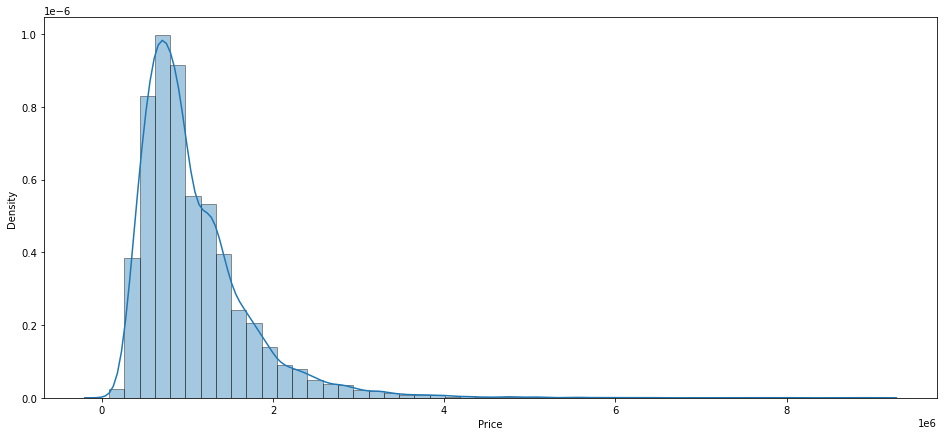

In [47]:
#histogram on the prices and its frequency
plt.figure(figsize=(16,7))
sns.distplot(df['Price'], kde = True,hist_kws=dict(edgecolor="k"),bins=50)

C:\Users\navde\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Car'>

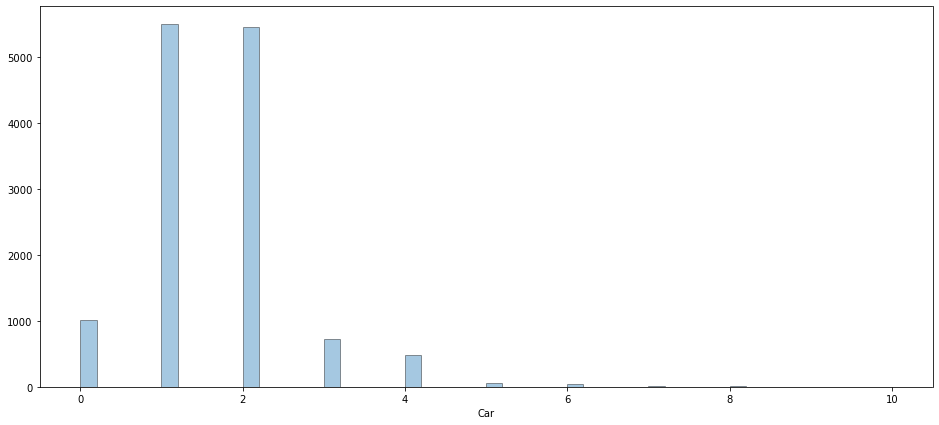

In [48]:
# car and its frequencies
plt.figure(figsize=(16,7))
sns.distplot(df['Car'], kde = False,hist_kws=dict(edgecolor="k"),bins=50)

<AxesSubplot:xlabel='Bathroom'>

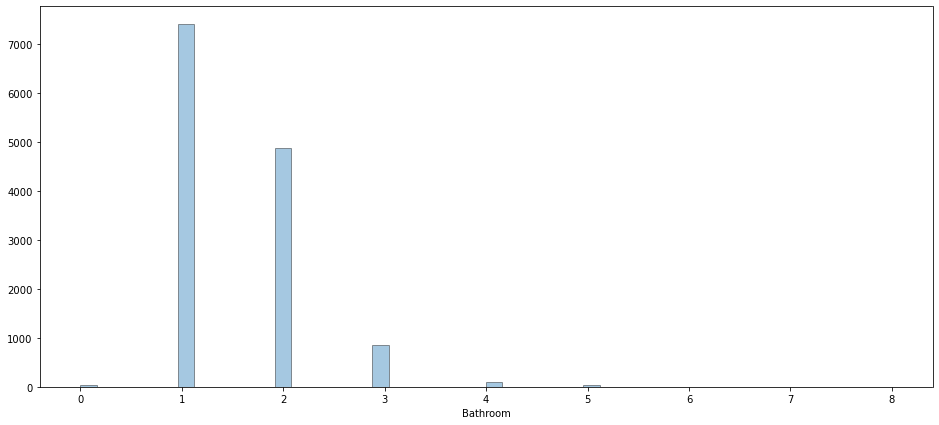

In [49]:
# bathroom frequency
plt.figure(figsize=(16,7))
sns.distplot(df['Bathroom'], kde = False,hist_kws=dict(edgecolor="k"))

<AxesSubplot:xlabel='Rooms'>

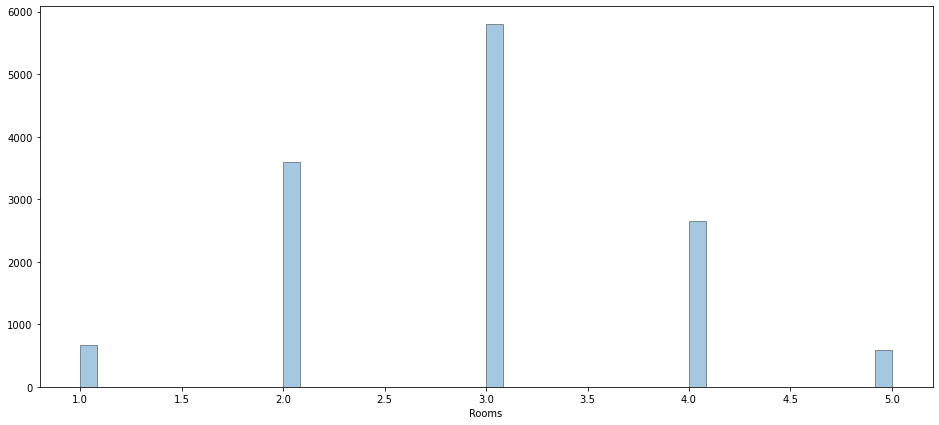

In [50]:
#rooms frequency
plt.figure(figsize=(16,7))
sns.distplot(df['Rooms'], kde = False,hist_kws=dict(edgecolor="k"))

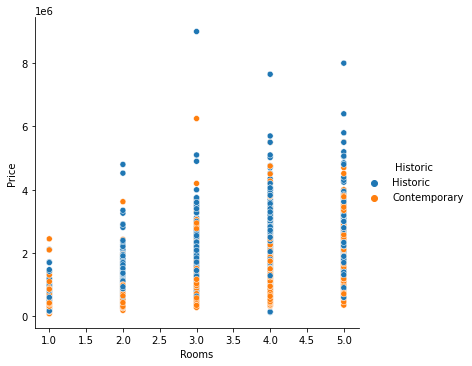

In [51]:
#rooms vs price
sns.relplot(x="Rooms",y="Price",hue='Historic',data=df)

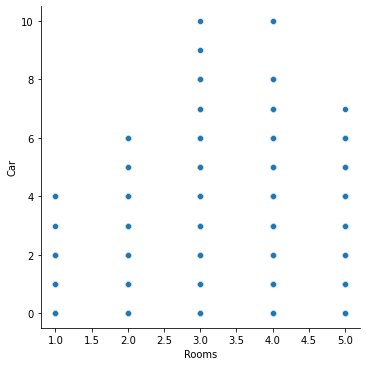

In [52]:
#rooms vs car
sns.relplot(x="Rooms",y="Car",data=df)

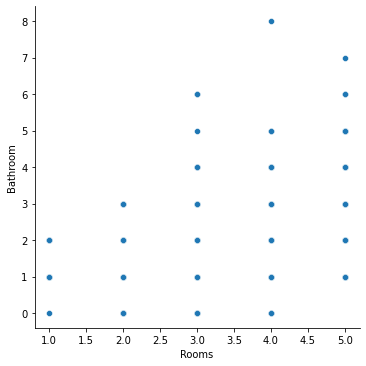

In [53]:
#rooms vs bathroom
sns.relplot(x="Rooms",y="Bathroom",data=df)

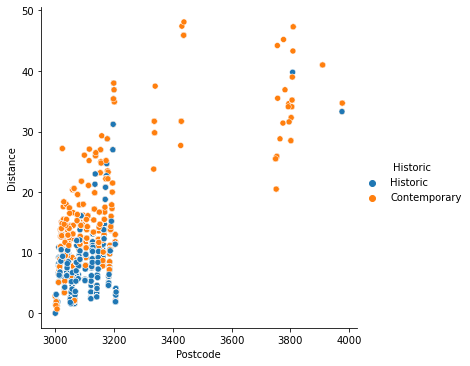

In [54]:
#postcode vs distance
sns.relplot(x="Postcode",y="Distance",hue='Historic',data=df)

### Correlation Matrix and Visualisation

In [55]:
corr=df.corr()
corr

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Count
Rooms,1.000000,0.497738,0.303688,0.056456,0.581628,0.405888,0.025083,0.015677,0.098849,-0.082206,0.107855
Price,0.497738,1.000000,-0.163037,0.108431,0.460527,0.231925,0.037166,-0.213794,0.203427,-0.045090,-0.054089
Distance,0.303688,-0.163037,1.000000,0.429345,0.128650,0.267785,0.024501,-0.132121,0.241836,-0.052958,0.294570
Postcode,0.056456,0.108431,0.429345,1.000000,0.115713,0.050963,0.024575,-0.406269,0.446416,0.062580,0.095311
Bathroom,0.581628,0.460527,0.128650,0.115713,1.000000,0.315962,0.036987,-0.070299,0.118006,-0.051631,0.039255
Car,0.405888,0.231925,0.267785,0.050963,0.315962,1.000000,0.025946,-0.001134,0.062071,-0.022749,0.089641
Landsize,0.025083,0.037166,0.024501,0.024575,0.036987,0.025946,1.000000,0.009950,0.010198,-0.006550,0.027322
Lattitude,0.015677,-0.213794,-0.132121,-0.406269,-0.070299,-0.001134,0.009950,1.000000,-0.354921,0.046734,0.043186
Longtitude,0.098849,0.203427,0.241836,0.446416,0.118006,0.062071,0.010198,-0.354921,1.000000,0.063069,0.058167
Propertycount,-0.082206,-0.045090,-0.052958,0.062580,-0.051631,-0.022749,-0.006550,0.046734,0.063069,1.000000,0.003719


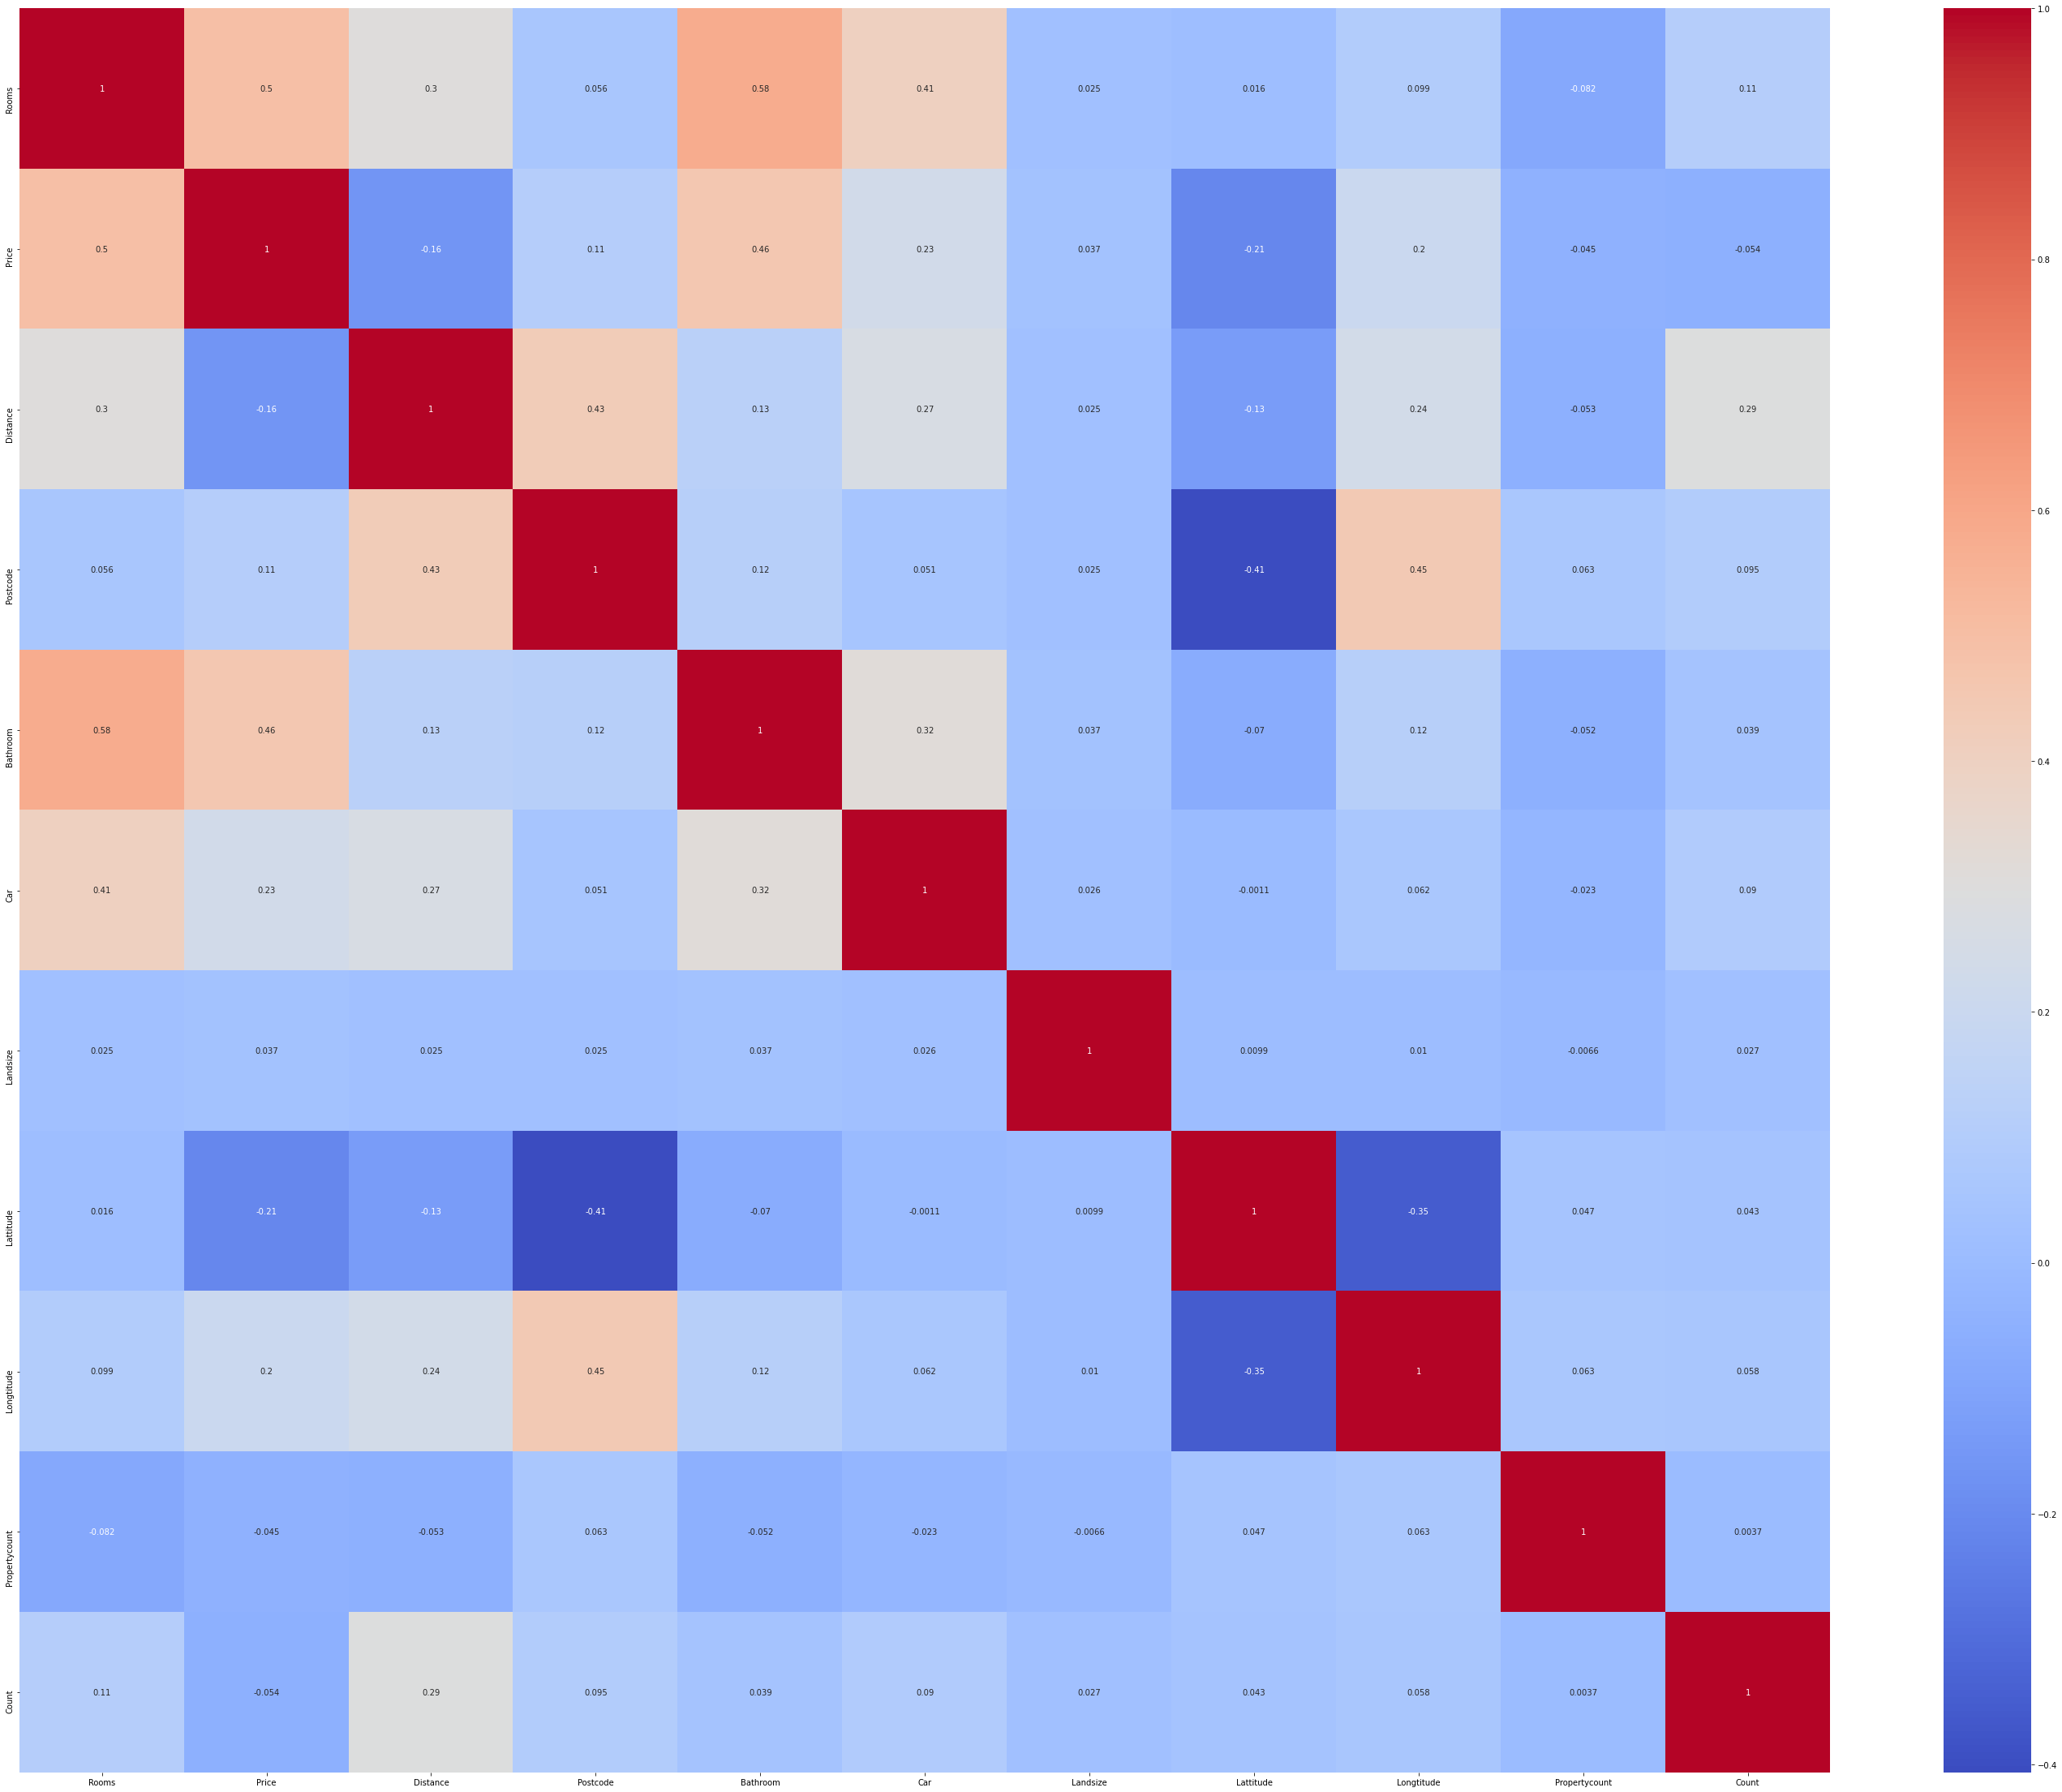

In [56]:
plt.figure(figsize=(50,40))
ax = sns.heatmap(corr, annot=True,cmap="coolwarm")

## Analyzing the categories in the dataset

In [57]:
#price feature categorisation
type_count = df.groupby("Type").count()
type_count["Type"]=["House","Townhouse","Unit"]
type_count

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count,Age,Historic,Type
Type,,,,,,,,,,,,,,,,,,,,,
h,9207,9207,9207,9207,9207,9207,9207,9207,9207,9207,...,9207,9200,9207,9207,9207,9207,9207,9207,9207,House
t,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101,...,1101,1101,1101,1101,1101,1101,1101,1101,1101,Townhouse
u,2983,2983,2983,2983,2983,2983,2983,2983,2983,2983,...,2983,2983,2983,2983,2983,2983,2983,2983,2983,Unit


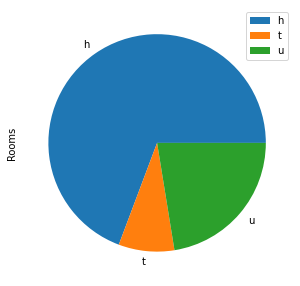

In [58]:
#pie chart
plot = type_count.plot.pie(y='Rooms', figsize=(5, 5))

In [59]:
#information about the type feature
type_mean=df.groupby("Type").mean()
type_mean['Type']=['House','Townhouse','Unit']
type_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, h to u
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          3 non-null      float64
 1   Price          3 non-null      float64
 2   Distance       3 non-null      float64
 3   Postcode       3 non-null      float64
 4   Bathroom       3 non-null      float64
 5   Car            3 non-null      float64
 6   Landsize       3 non-null      float64
 7   Lattitude      3 non-null      float64
 8   Longtitude     3 non-null      float64
 9   Propertycount  3 non-null      float64
 10  Count          3 non-null      float64
 11  Type           3 non-null      object 
dtypes: float64(11), object(1)
memory usage: 312.0+ bytes


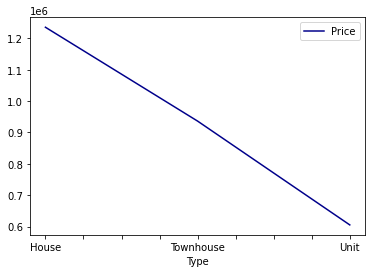

In [60]:
#line graph of mean prices 
ax = type_mean.plot.line(x='Type',y='Price',c='DarkBlue')

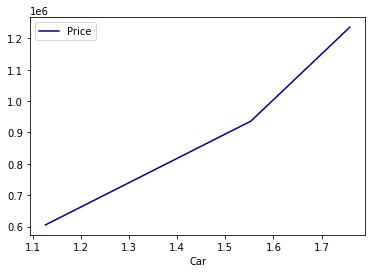

In [61]:
#car vs price in the _houses dataset
ax = type_mean.plot.line(x='Car',y='Price',c='DarkBlue')

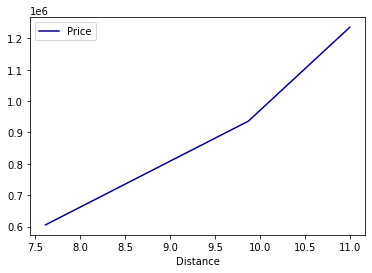

In [62]:
#distance vs price in the _houses dataset
ax = type_mean.plot.line(x='Distance',y='Price',c='DarkBlue')

# DATA FREQUENCY

In [63]:
#highest count of houses in dataset
suburb_count = df.groupby("Suburb").count().reset_index()
suburb_count.sort_values(by=['Address']).tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count,Age,Historic
46,Brunswick,218,218,218,218,218,218,218,218,218,...,218,218,218,218,218,218,218,218,218,218
234,Preston,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
30,Bentleigh East,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248
237,Richmond,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
236,Reservoir,356,356,356,356,356,356,356,356,356,...,356,356,356,356,356,356,356,356,356,356


In [64]:
#lowest count 
suburb_count.sort_values(by=['Address']).head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Count,Age,Historic
230,Plumpton,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
19,Bacchus Marsh,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
26,Beaconsfield Upper,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
247,Sandhurst,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100,Diggers Rest,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='Suburb'>

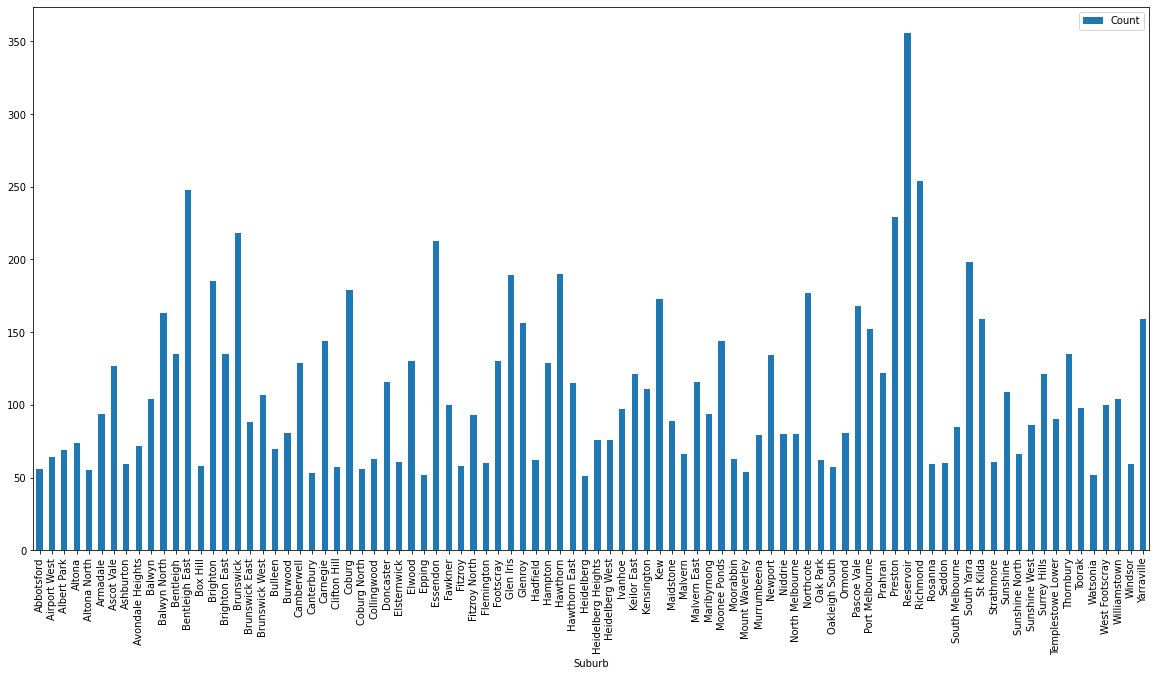

In [65]:
#high count of data records
high_count=(suburb_count.where(suburb_count['Address']>50))
high_count=high_count.dropna()
high_count['Count']=high_count['Address']

high_count.plot.bar(x='Suburb',y='Count',figsize=(20,10))

<AxesSubplot:xlabel='Suburb'>

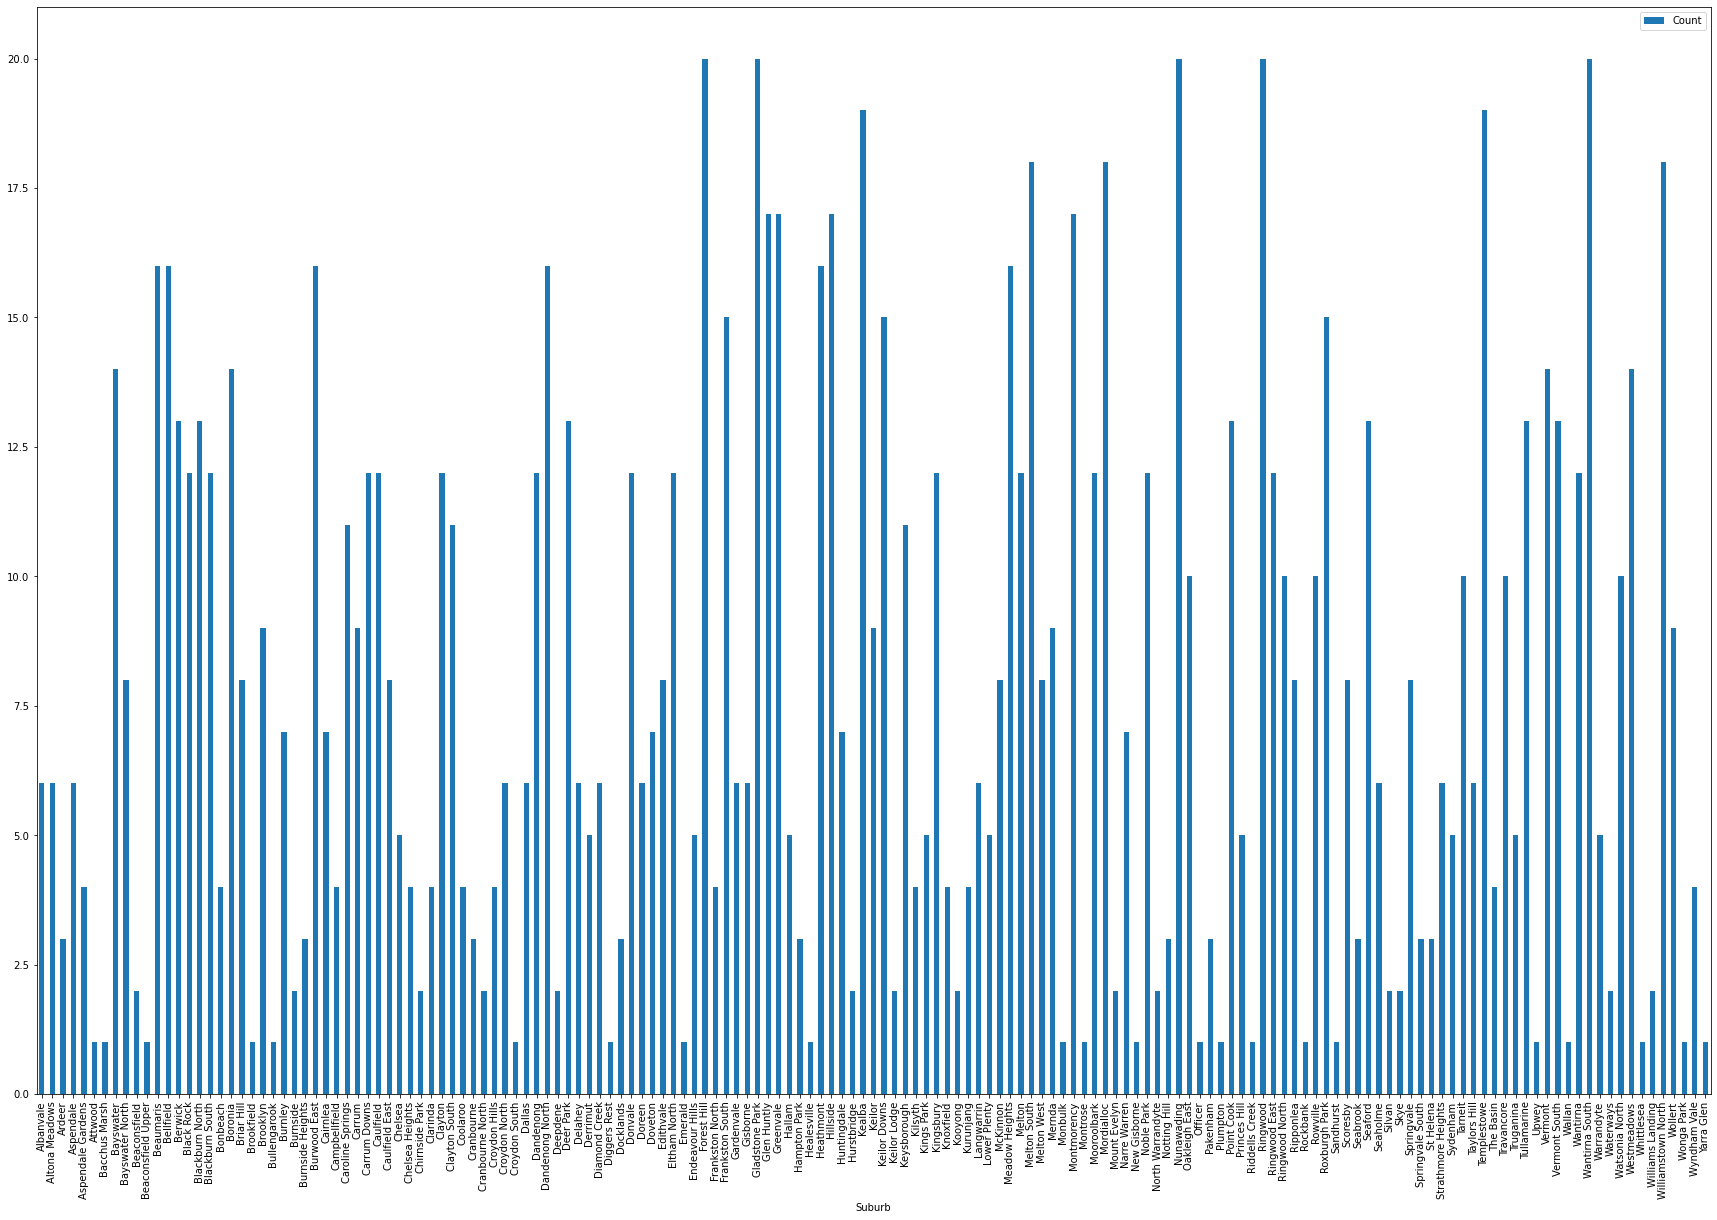

In [66]:
#low count of data records
low_count=(suburb_count.where(suburb_count['Address']<=20))
low_count=low_count.dropna()
low_count['Count']=low_count['Address']
low_count.plot.bar(x='Suburb',y='Count',figsize=(30,20))


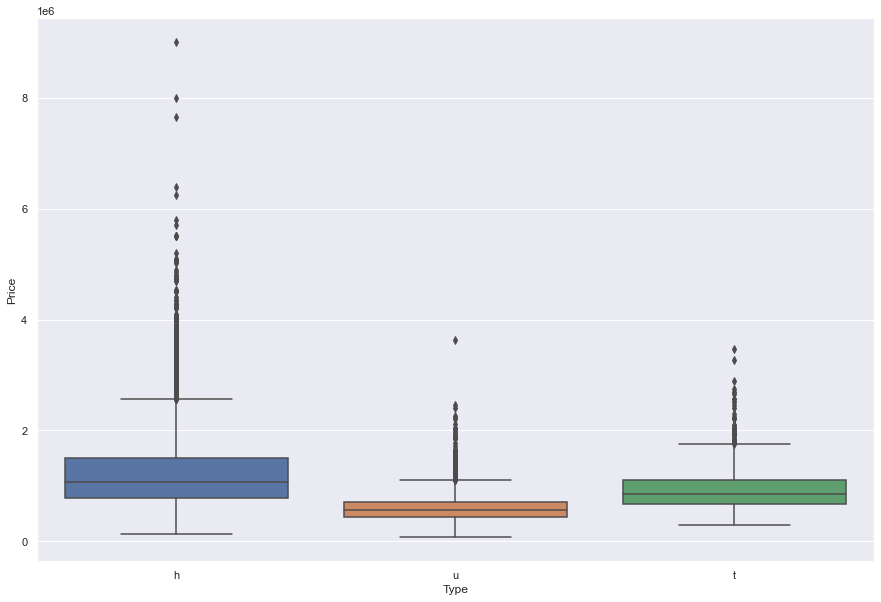

In [67]:
#boxplot on price on different types of houses
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(x="Type", y="Price", data=df)

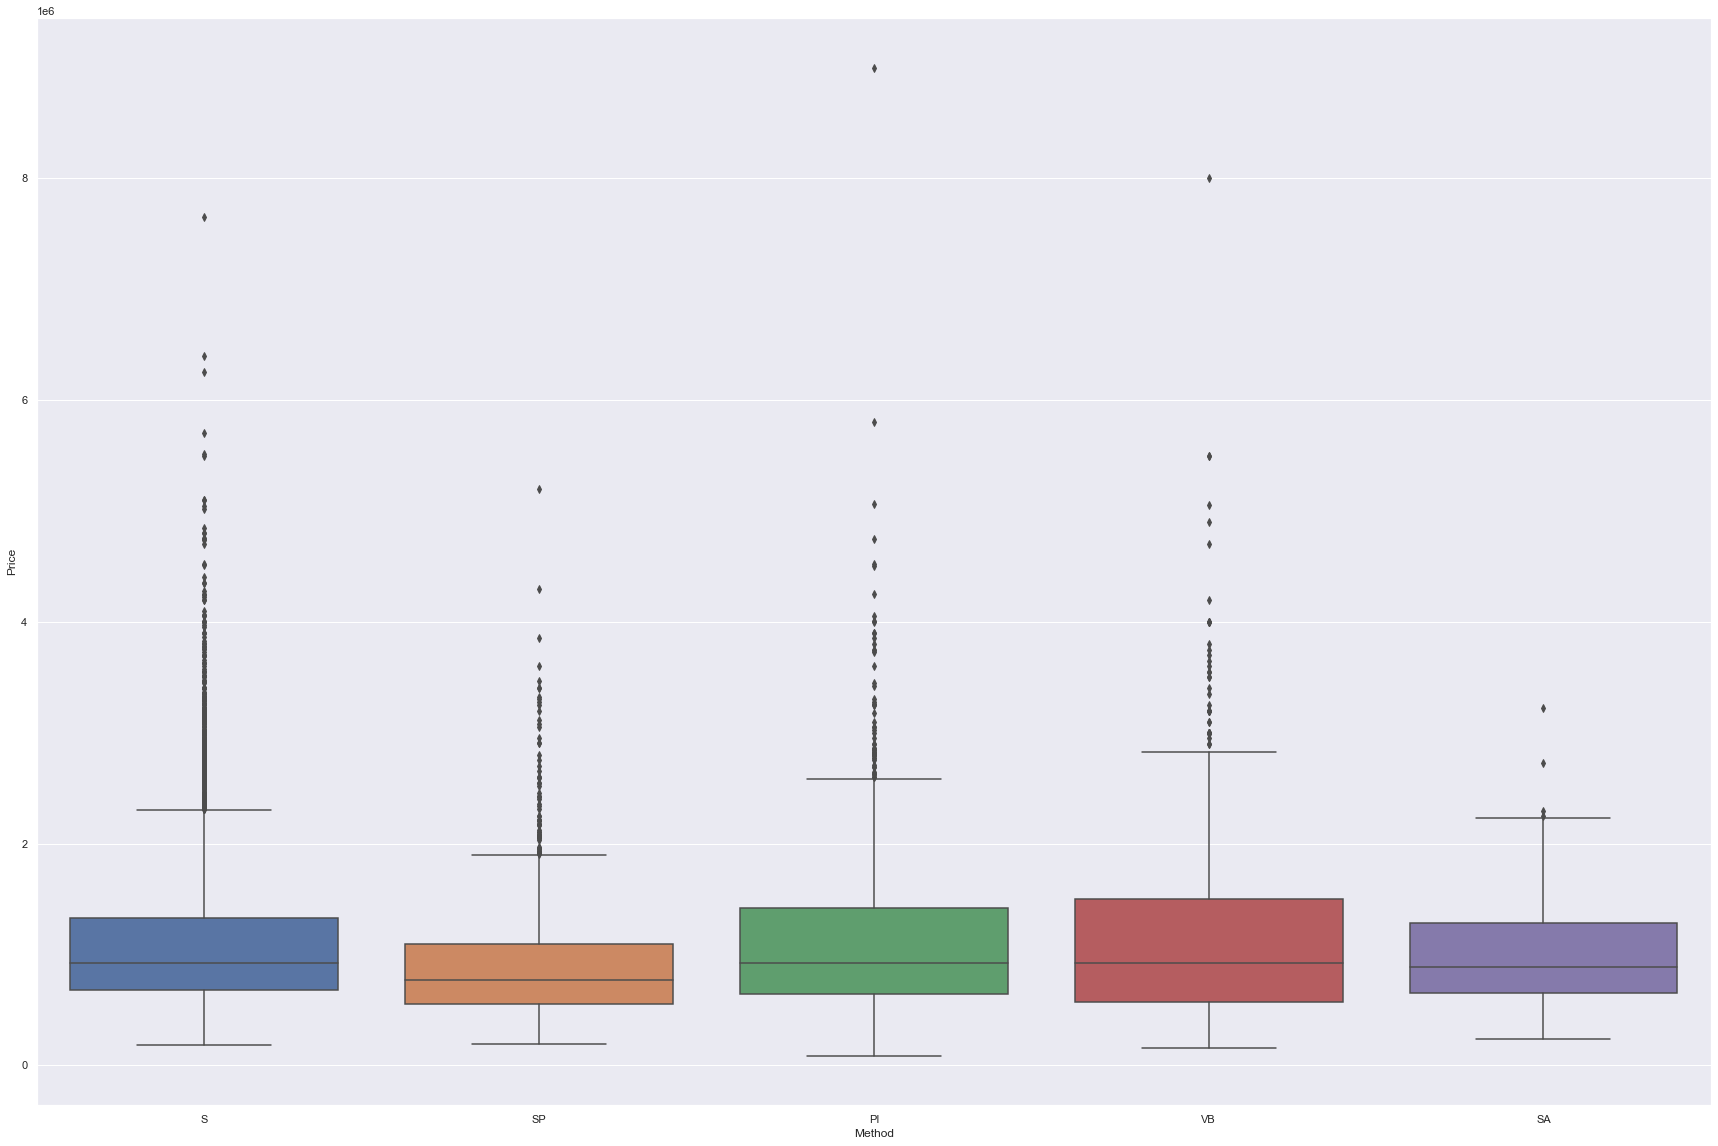

In [68]:
#boxplot on price on different methods by the house was sold
sns.set(rc={'figure.figsize':(30,20)})
ax = sns.boxplot(x="Method", y="Price", data=df)

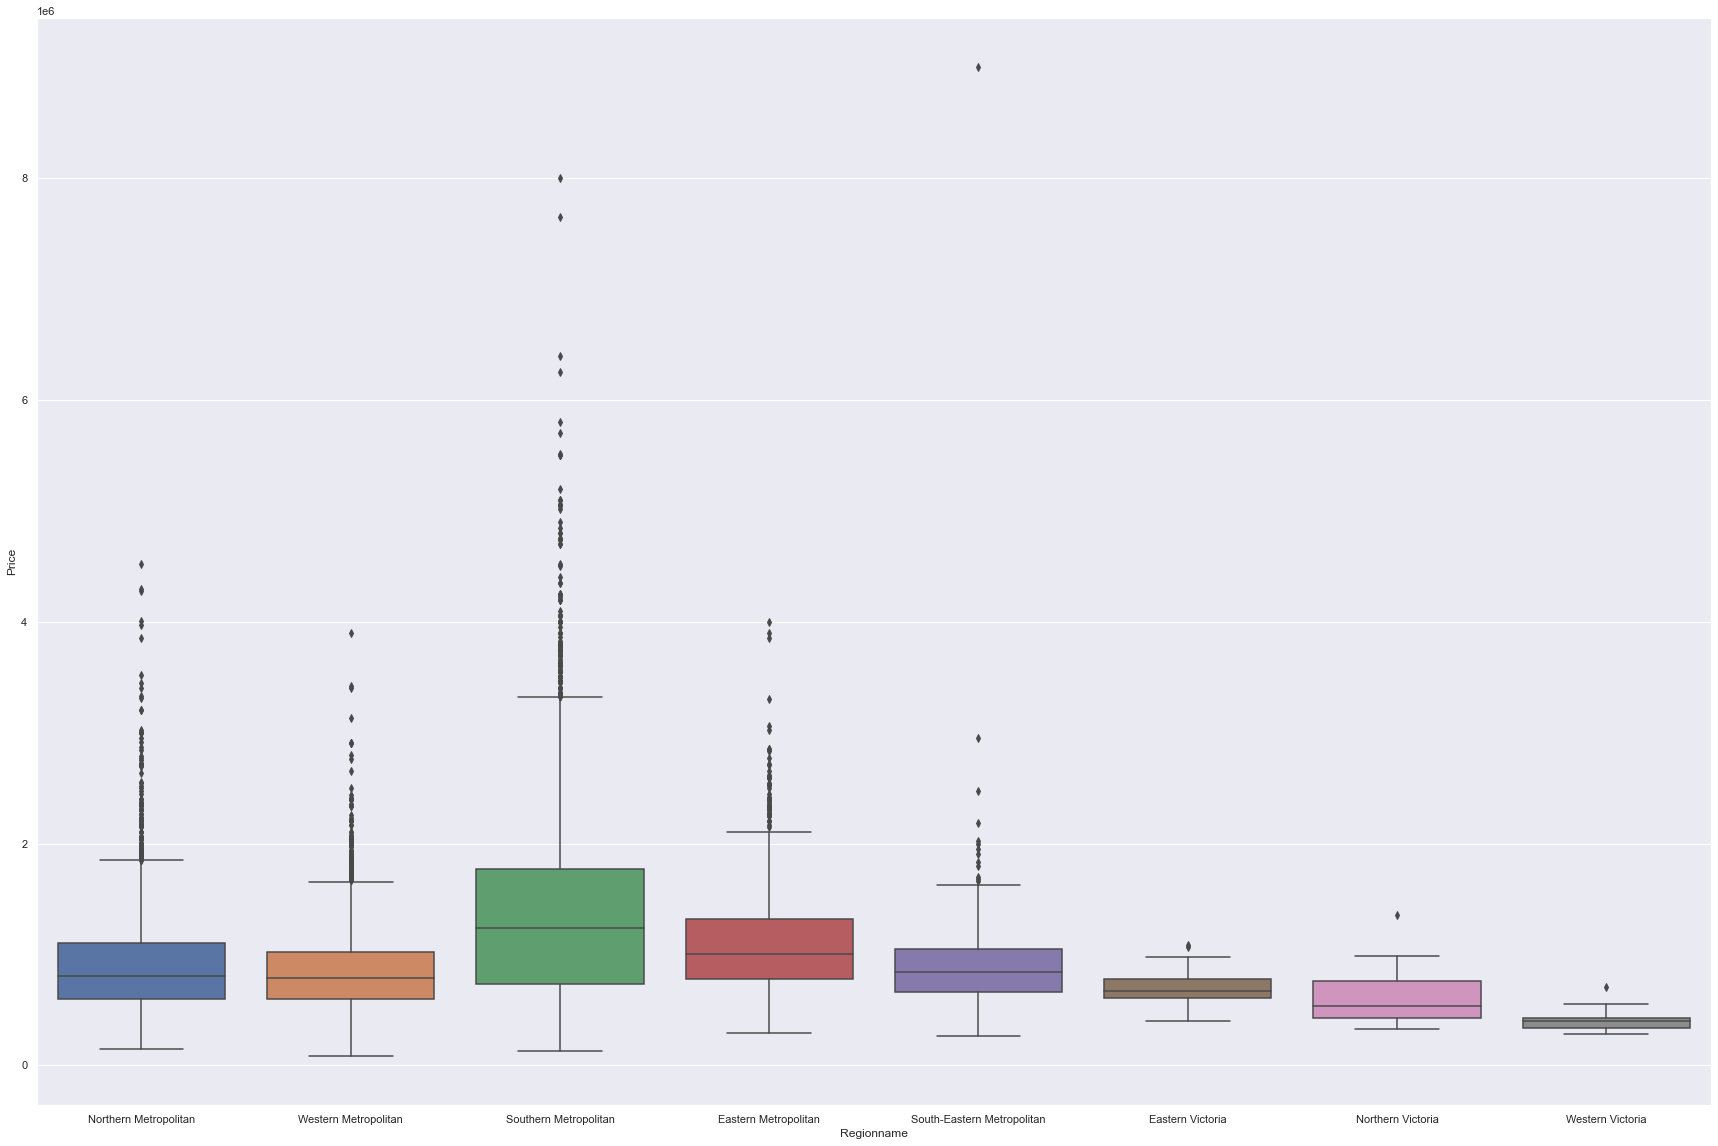

In [69]:
#boxplot on price on different regions across melbourne
sns.set(rc={'figure.figsize':(30,20)})
ax = sns.boxplot(x="Regionname", y="Price", data=df)

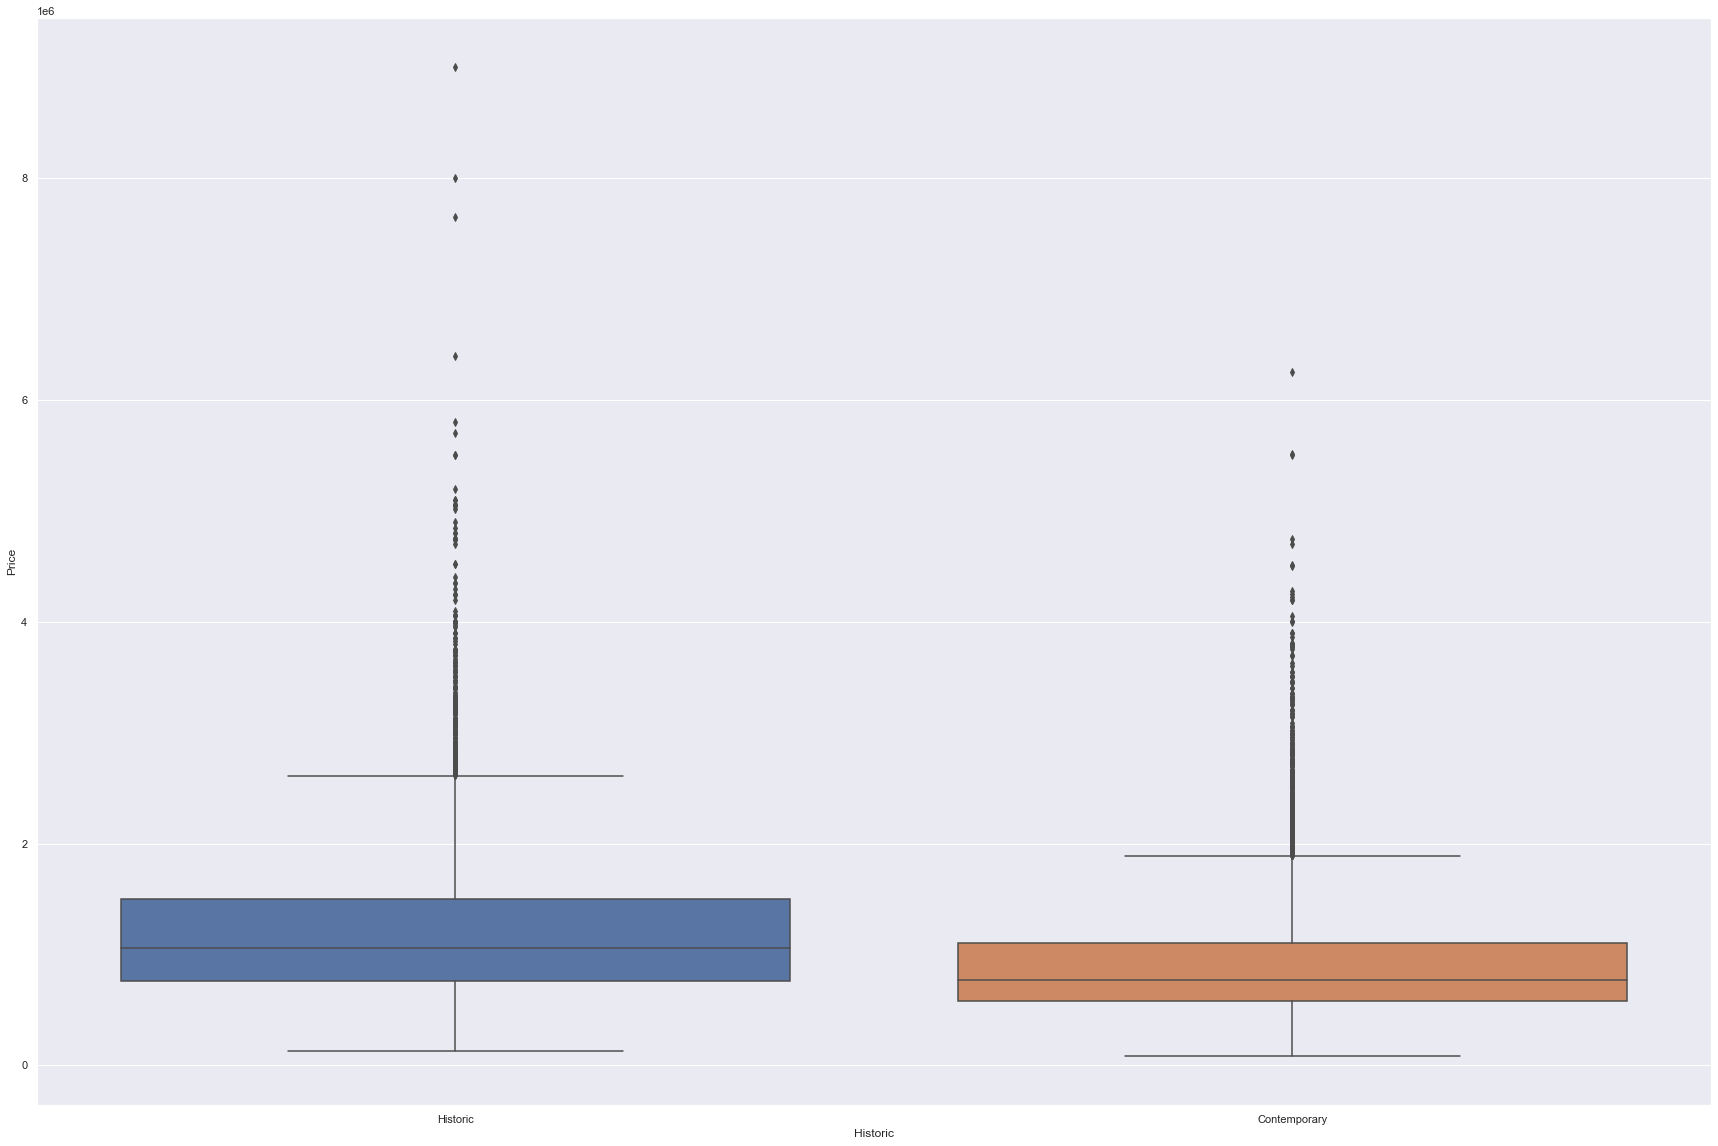

In [70]:
#boxplot on price on different timeline of building the house
sns.set(rc={'figure.figsize':(30,20)})
ax = sns.boxplot(x="Historic", y="Price", data=df)

## SCATTERPLOTS

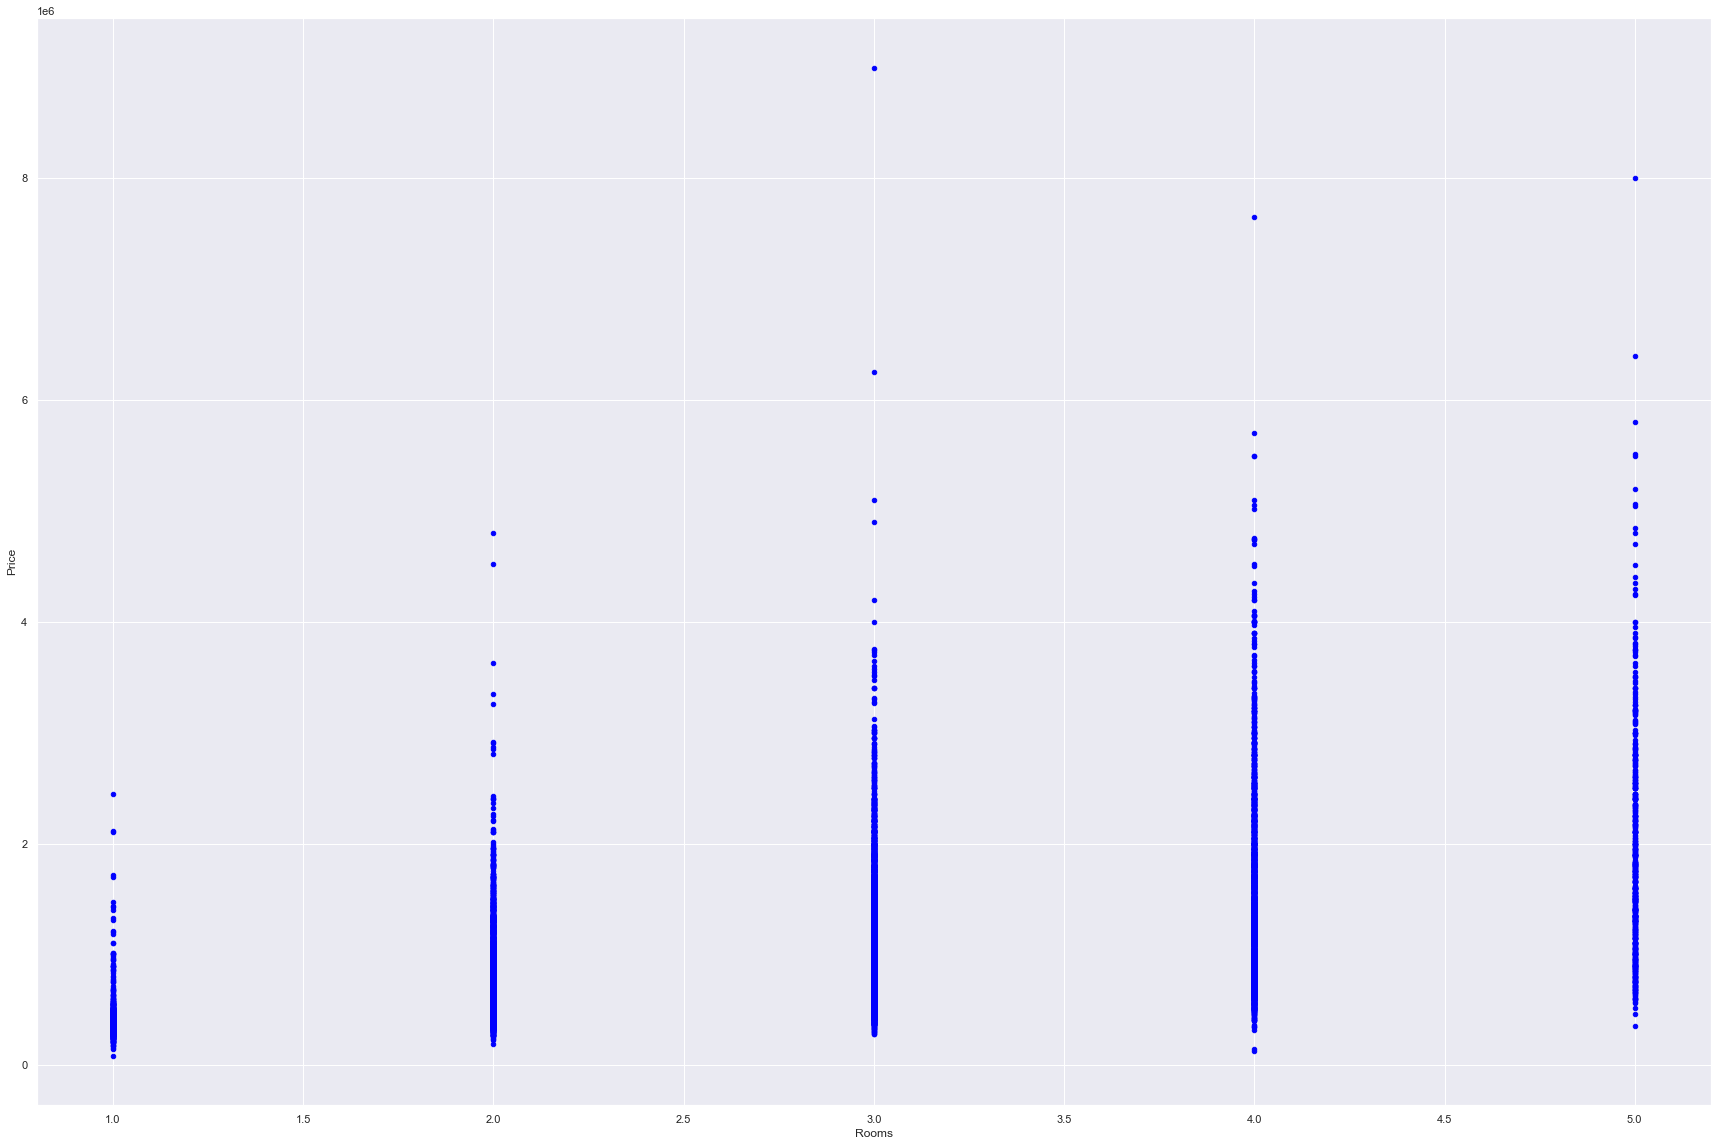

In [71]:
#scatterplot on rooms vs price for original dataset
ax2 = df.plot.scatter(x='Rooms',y='Price',c='blue')                      

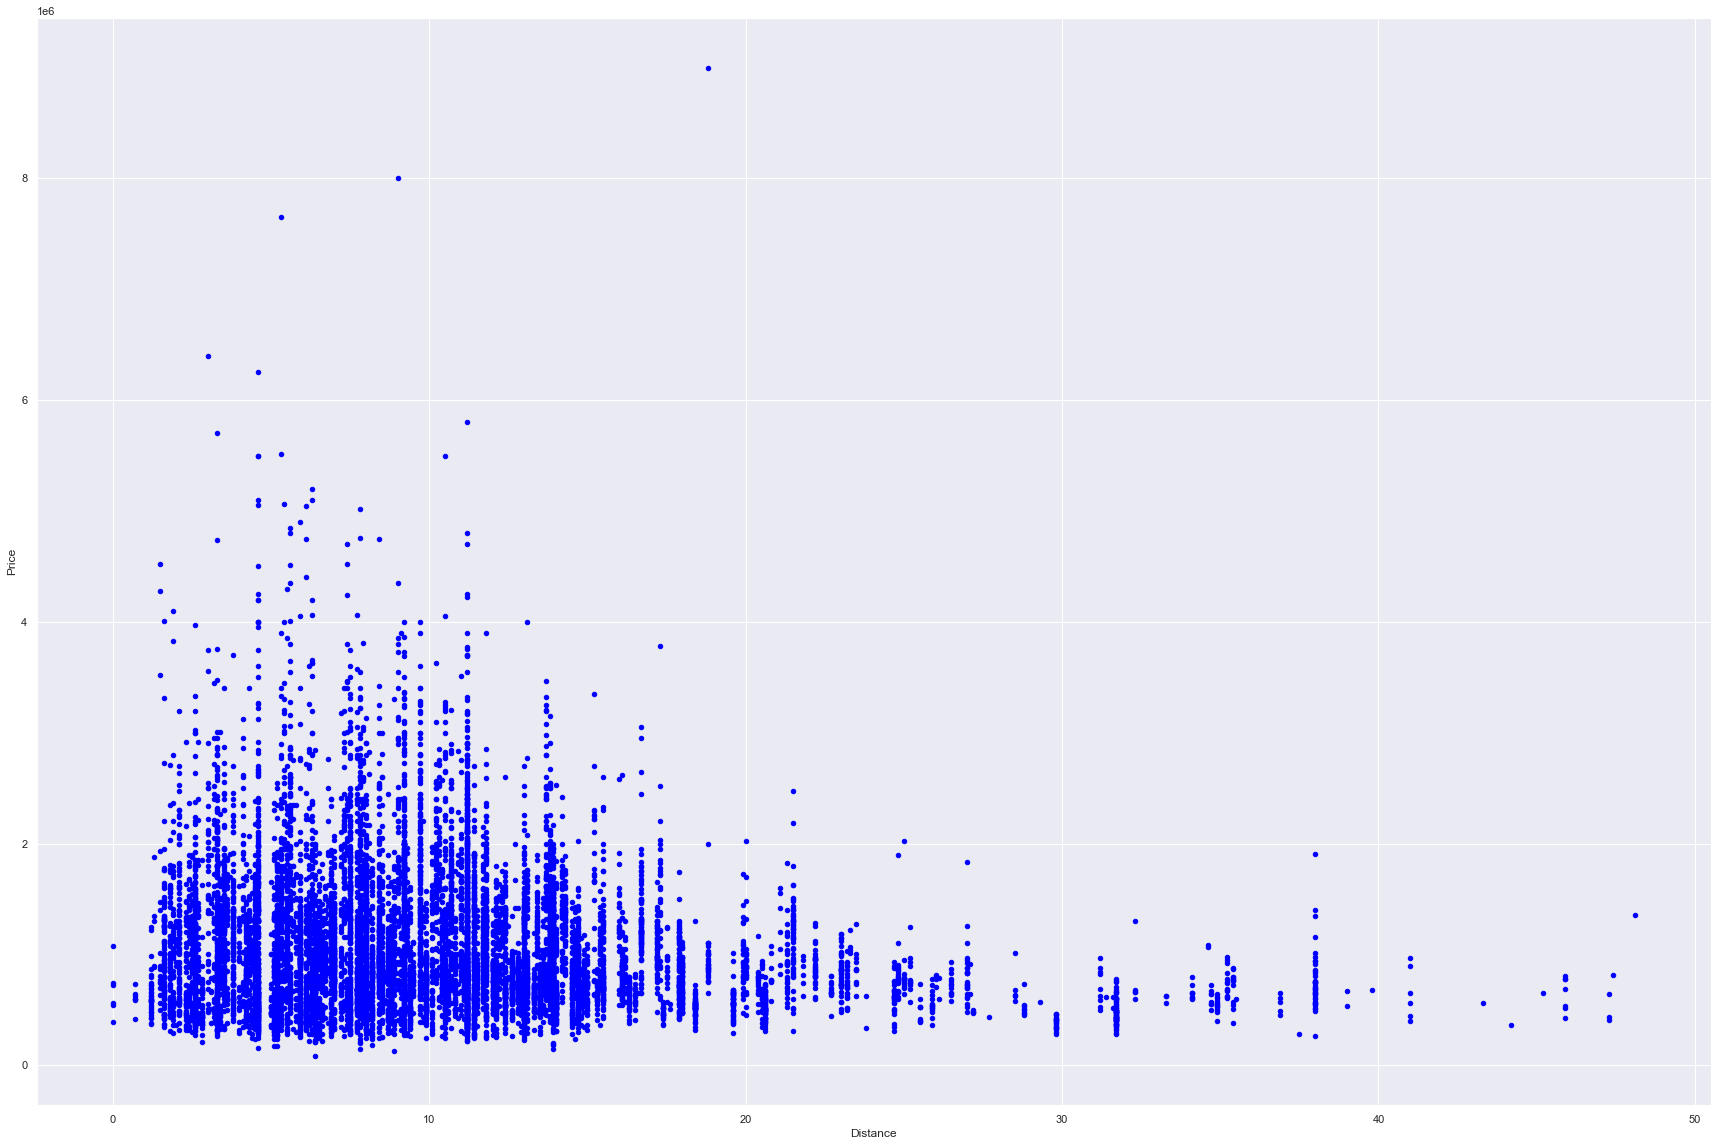

In [72]:
#scatterplot on DISTANCE vs price for original dataset
ax2 = df.plot.scatter(x='Distance',y='Price',c='blue')                      

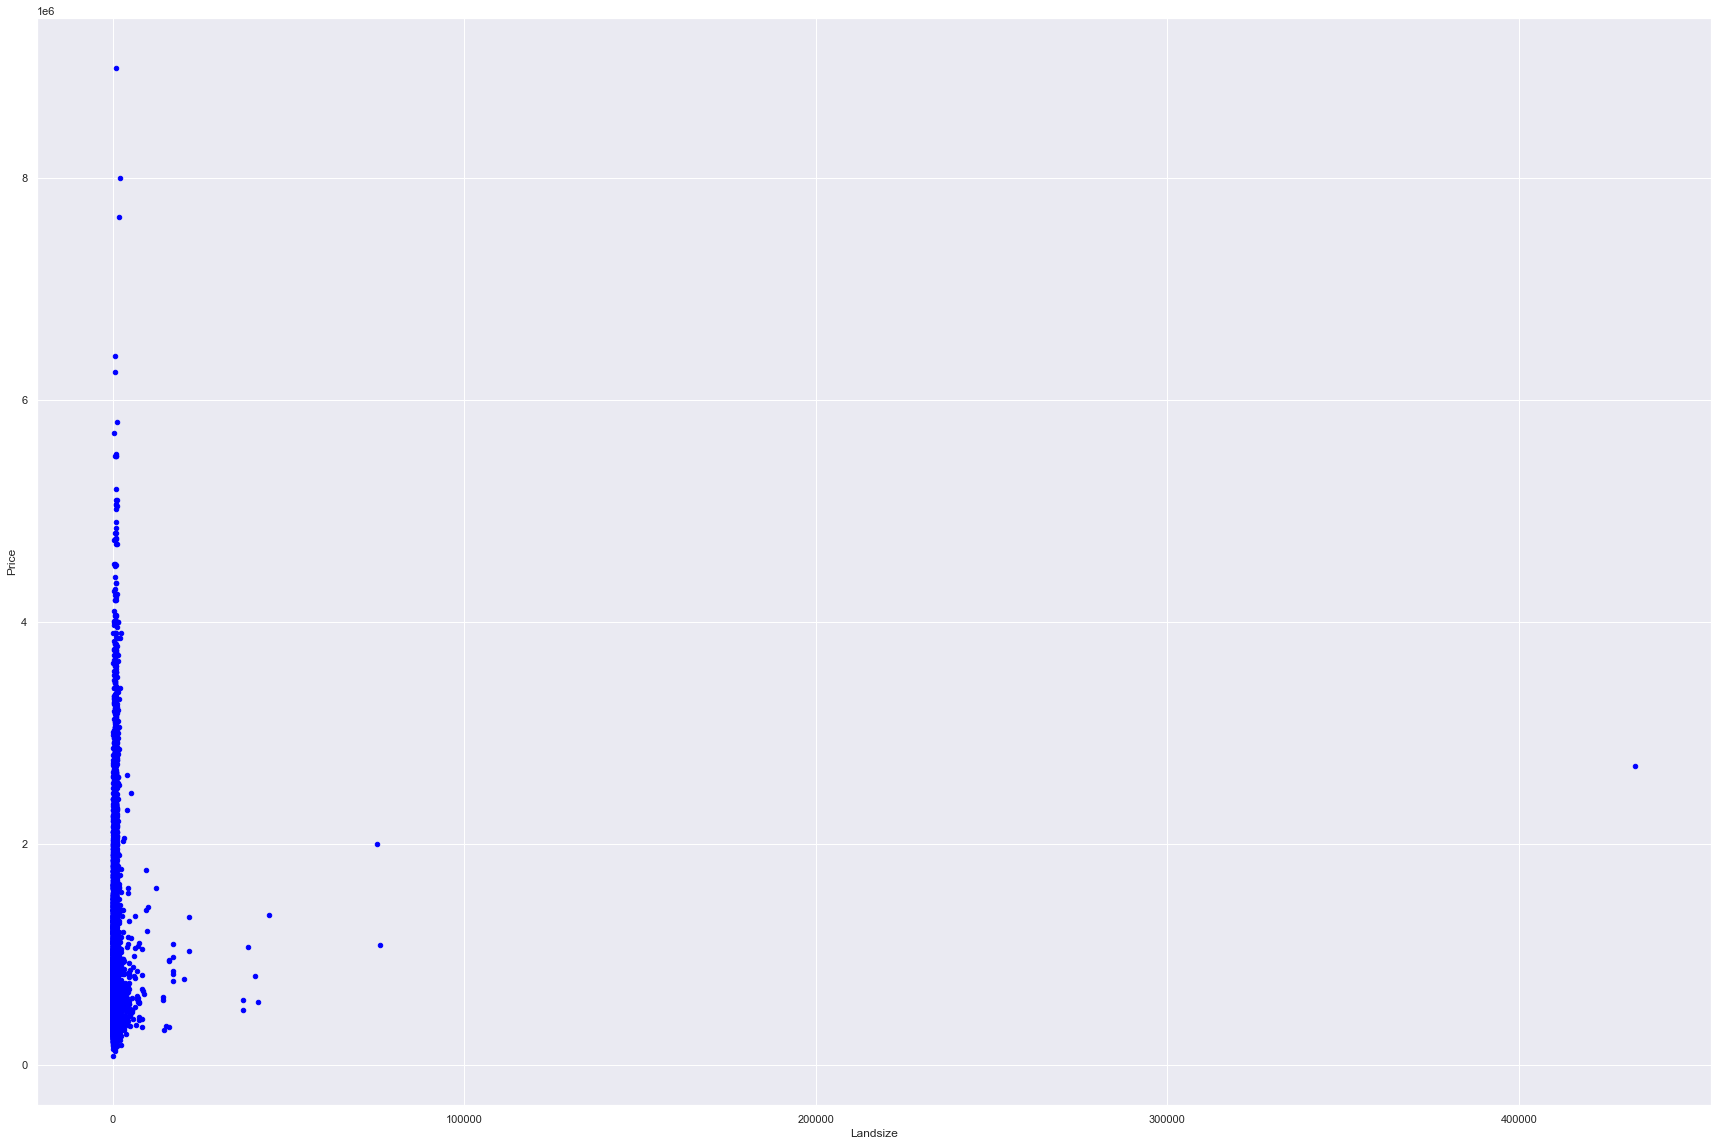

In [73]:
#scatterplot on landsize vs price for original dataset
ax2 = df.plot.scatter(x='Landsize',y='Price',c='blue')                      